# **EDA**

- EDA
- Feature Engineering + Preprocessing
- Modelling
- Interpretation

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_label = pd.read_csv('train_labels.csv')

In [153]:
train_data.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [154]:
test_data.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [155]:
train_data.shape, test_data.shape

((59400, 40), (14850, 40))

# **Target Variable**

<Axes: ylabel='status_group'>

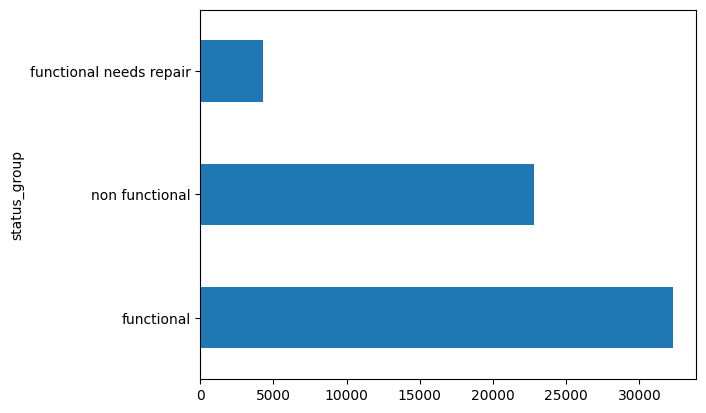

In [156]:
train_label.status_group.value_counts().plot.barh()

# **Datalari Birlesiririk**

In [157]:
train_data['is_train'] = True
test_data['is_train'] = False
data = pd.concat([train_data, test_data])

In [158]:
data.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,is_train
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True


# **Bos Datalar**

In [159]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

,0
scheme_name,48.554882
scheme_management,6.527946
installer,6.103704
funder,6.070034
public_meeting,5.595960
permit,5.108418
subvillage,0.632997
wpt_name,0.002694
water_quality,0.000000
extraction_type_class,0.000000


In [160]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'is_train'],
      dtype='object')

# **amount_tsh**

<Axes: >

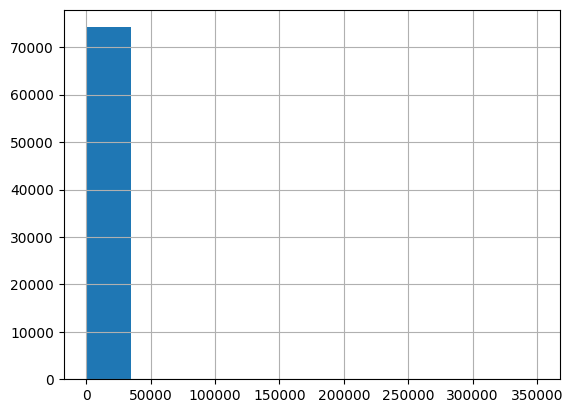

In [161]:
data['amount_tsh'].hist()

In [162]:
data['amount_tsh_is_null'] = data['amount_tsh'] == 0

In [163]:
data['amount_tsh_is_null'].value_counts(normalize=True)

,proportion
amount_tsh_is_null,
True,0.700997
False,0.299003


# **date_recorded**

In [ ]:
data['date_recorded'].hist()

In [ ]:
data['date_recorded'].value_counts().iloc[:10]

In [ ]:
data['date_recorded'] = pd.to_datetime(data['date_recorded'])

In [ ]:
data['year_recorded'] = data['date_recorded'].dt.year
data['month_recorded'] = data["date_recorded"].dt.month

In [ ]:
data['year_recorded'].hist()

In [ ]:
data['month_recorded'].hist()

# **Longitude, Latitude**

In [ ]:
data[['longitude','latitude']].head(5)

In [ ]:
data[['longitude','latitude']].isnull().sum()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data.longitude, data.latitude, c = data.gps_height)
sns.despine()
plt.show()

In [ ]:
len(data['subvillage'].unique())

In [ ]:
average_coodinates_subvillage = data[data['longitude']!=0.0].groupby('subvillage')[['longitude','latitude']].mean()

In [ ]:
data.longitude[data['longitude']==0.0] = data[data['longitude']==0.0].subvillage.map(average_coodinates_subvillage.longitude)
data.latitude[data['latitude']==0.0] = data[data['latitude']==0.0].subvillage.map(average_coodinates_subvillage.latitude)

# **funder**

In [ ]:
data['funder'].isnull().sum()/data.shape[0]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['funder'].isnull().sum()

In [ ]:
data.longitude.fillna(data.longitude.mean(), inplace=True)
data.latitude.fillna(data.latitude.mean(), inplace=True)

In [ ]:
# data['funder_encoded'][data['funder'].isnull()] = knn.predict(data[['longitude', 'latitude']][data['funder'].isnull()])

In [ ]:
def fill_missing_values(column_name, is_categorical=True, data=data):
    # knn = KNeighborsClassifier()
    if is_categorical:
        knn = KNeighborsClassifier()
        le = LabelEncoder()
        data[f"{column_name}_encoded"] = le.fit_transform(
            data[column_name].astype(str)
        )
        y = data[f"{column_name}_encoded"]
    else:
        knn = KNeighborsRegressor()
        y = data[column_name]

    X = data[['longitude', 'latitude']]
    condition = (~data[column_name].isnull()) & (data.is_train)

    knn.fit(
        X=X[condition],
        y=y[condition]
    )

    if is_categorical:
        data[f"{column_name}_encoded"][data[column_name].isnull()] = knn.predict(
            X[data[column_name].isnull()]
        )
    else:
        data[column_name][data[column_name].isnull()] = knn.predict(
            X[data[column_name].isnull()]
        )


In [ ]:
fill_missing_values('funder')

In [ ]:
data['funder_encoded'].isnull().sum()

# **GPS Height**

In [ ]:
data['gps_height'].value_counts()

In [ ]:
data['gps_height'][data['gps_height']==0] = np.NaN

In [ ]:
fill_missing_values('gps_height', is_categorical=False)

In [ ]:
data['gps_height'].isnull().sum()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data.longitude, data.latitude, c = data.gps_height)
sns.despine()
plt.show()

# **Filling Missing Values**


In [ ]:
data.columns

In [ ]:
fill_missing_values('installer', is_categorical=True)

In [ ]:
to_fill = [
    'scheme_name'	,
'construction_year'	,
'scheme_management'	,
'installer'	,
'funder'	,
'public_meeting'	,
'permit'	,
'subvillage'	,
'wpt_name'
]
to_fill_numerical = [
    'population'
]

In [ ]:
fill_missing_values('installer', is_categorical=True)

In [ ]:
data['population'][data['population']<2] = np.NaN
fill_missing_values('population', is_categorical=False)

In [ ]:
data['construction_year'][data['construction_year']==0] = np.NaN

In [ ]:
for fr in to_fill:
  fill_missing_values(fr, is_categorical=True)

In [ ]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

In [ ]:
to_encode = [
    'wpt_name',
    'basin',
    'subvillage',
    'region',
    'region_code',
    'district_code',
    'lga',
    'ward',
    'scheme_management',
    'scheme_name',
    'construction_year',
    'extraction_type',
    'extraction_type_group',
    'extraction_type_class',
    'management',
    'management_group',
    'payment',
    'payment_type',
    'water_quality',
    'quality_group',
    'quantity',
    'quantity_group',
    'waterpoint_type',
    'waterpoint_type_group',
    'source',
    'source_type',
    'source_class'



]

In [ ]:
to_drop = [
    'id',
     'date_recorded',
    'num_private',
    'recorded_by',
    'scheme_name'	,
'construction_year'	,
'scheme_management'	,
'installer'	,
'funder'	,
'public_meeting'	,
'permit'	,
'subvillage'	,
'wpt_name'
]

In [ ]:
data = data.drop(to_drop, axis=1)

In [ ]:
to_encode = list(set(to_encode)- set(to_drop))

In [ ]:
le = LabelEncoder()
for fr in to_encode:
  data[f"{fr}_encoded"] = le.fit_transform(data[fr])

In [ ]:
data.drop(to_encode, axis=1, inplace=True)

In [ ]:
data.info()

# **Model Building**

In [ ]:
data.head(5)

<Axes: >

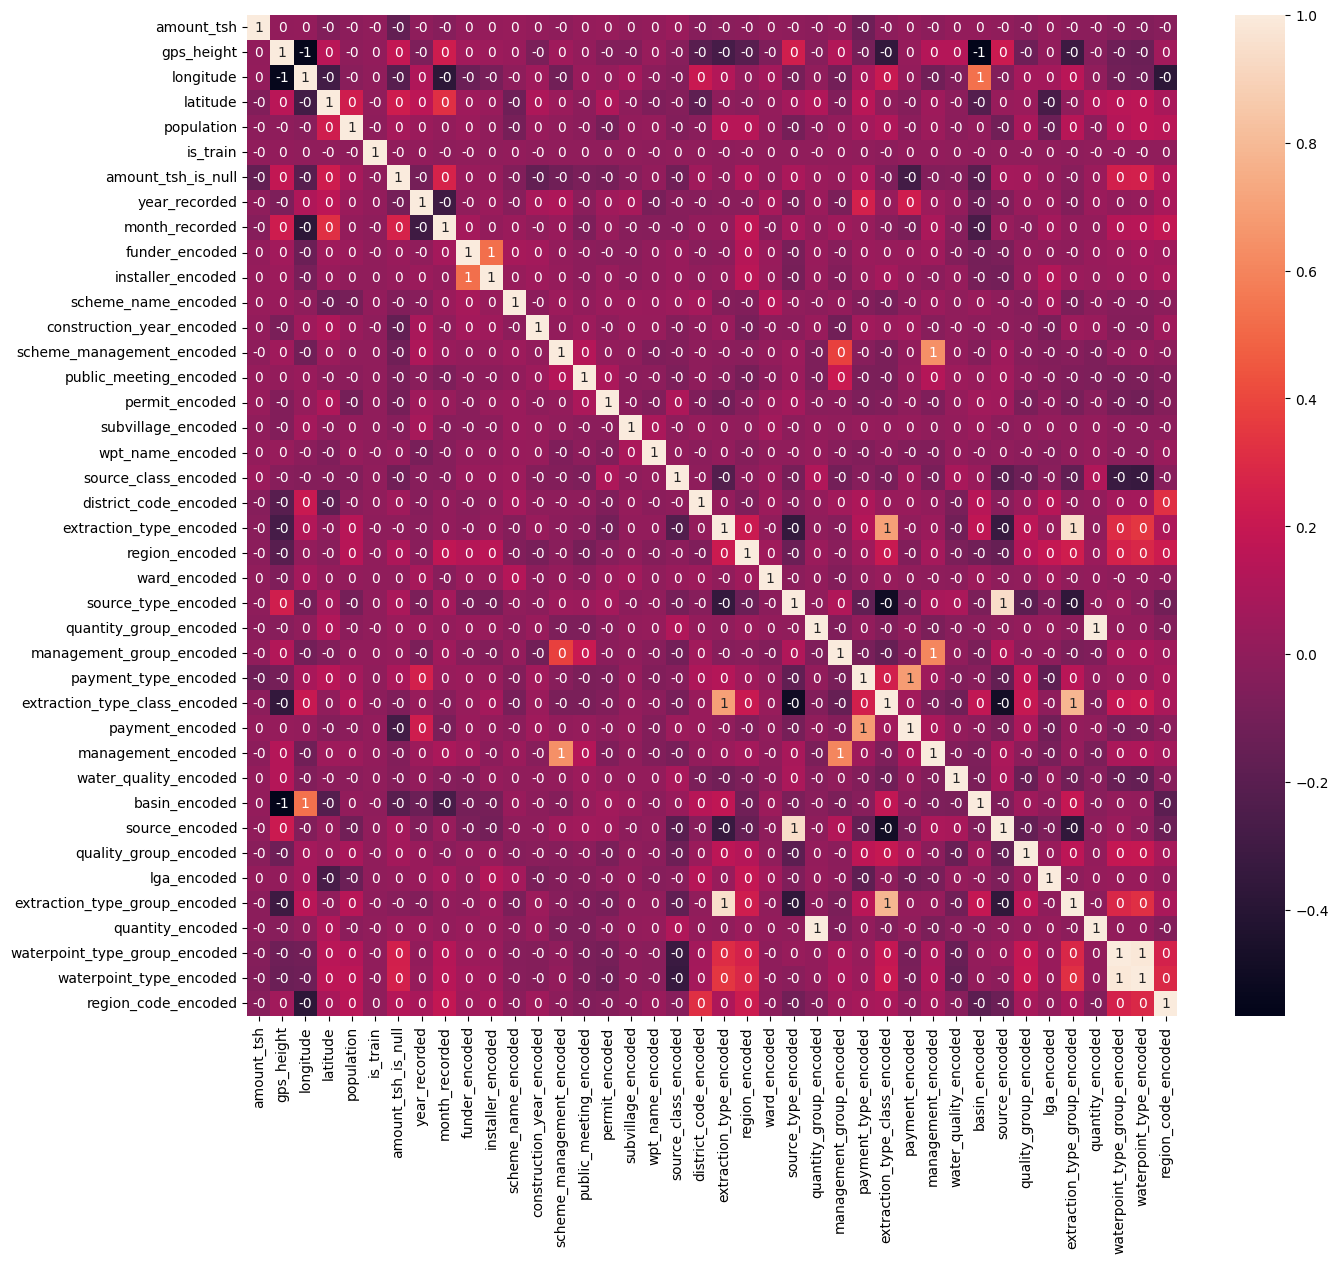

In [140]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(), annot=True, fmt='.0f')

In [141]:
to_encode = [
    'wpt_name',
    'basin',
    'subvillage',
    'region',
    'region_code',
    'district_code',
    'lga',
    'ward',
    'scheme_management',
    'scheme_name',
    'construction_year',
    'extraction_type',
    'extraction_type_group',
    'extraction_type_class',
    'management',
    'management_group',
    'payment',
    'payment_type',
    'water_quality',
    'quality_group',
    'quantity',
    'quantity_group',
    'waterpoint_type',
    'waterpoint_type_group',
    'source',
    'source_type',
    'source_class'



]

In [142]:
to_encode = [feature+ '_encoded' for feature in to_encode]

In [143]:
for fr in to_encode:
  if len(data[fr].unique())<27:
     frequency_encoder = data[fr].value_counts(normalize=True)
     data[fr] = data[fr].map(frequency_encoder)

In [144]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor


In [145]:
train = data[data.is_train]
test = data[~data.is_train]
y = train_label.status_group

In [146]:
dummy_clf = DummyClassifier()

In [147]:
X_train, X_test, y_train, y_test = train_test_split(train, y.values, test_size=.3, random_state=42, stratify=y.values)

In [148]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [173]:
model = RandomForestClassifier()
# grd = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# grd.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [164]:
# best_model = grd.best_estimator_
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)

In [165]:
acc = accuracy_score(y_test, preds)
creport = classification_report(y_test, preds)
cm = confusion_matrix(y_test, preds)

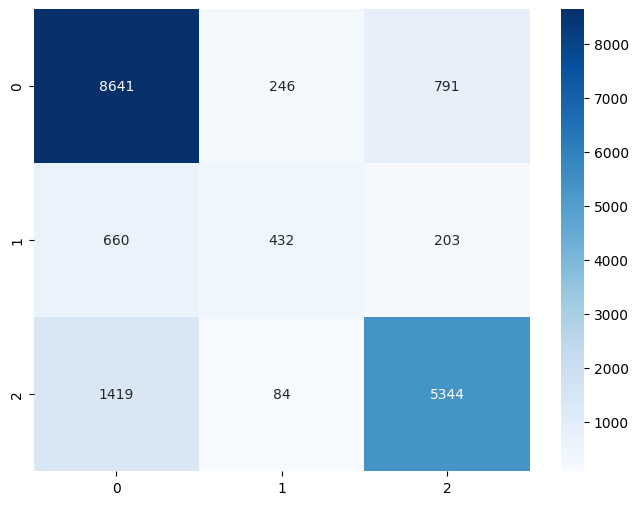

Accuracy: 0.8090347923681257
                         precision    recall  f1-score   support

             functional       0.81      0.89      0.85      9678
functional needs repair       0.57      0.33      0.42      1295
         non functional       0.84      0.78      0.81      6847

               accuracy                           0.81     17820
              macro avg       0.74      0.67      0.69     17820
           weighted avg       0.80      0.81      0.80     17820



In [166]:
plt.figure(figsize=(8,6) )
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
print(f'Accuracy: {acc}')
print(creport)

In [168]:
submission_preds = model.predict(test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [170]:
submission_format = pd.read_csv('SubmissionFormat.csv')

In [171]:
submission_format['status_group'] = submission_preds

In [172]:
submission_format.to_csv('finished_submission.csv', index=False)